# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "/content/drive/MyDrive/[1] COLLEGE/S03EP02/CPE313/Datasets/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
581,6,109,60,27,0,25.0,0.206,27,0
334,1,95,60,18,58,23.9,0.260,22,0
665,1,112,80,45,132,34.8,0.217,24,0
452,0,91,68,32,210,39.9,0.381,25,0
406,4,115,72,0,0,28.9,0.376,46,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
diabetes_df.shape

(768, 9)

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 24ms/step - loss: 0.7621 - accuracy: 0.4167 - val_loss: 0.7772 - val_accuracy: 0.4479
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7398 - accuracy: 0.4601 - val_loss: 0.7548 - val_accuracy: 0.4896
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7214 - accuracy: 0.5278 - val_loss: 0.7358 - val_accuracy: 0.5208
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7053 - accuracy: 0.5642 - val_loss: 0.7193 - val_accuracy: 0.5677
Epoch 5/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5903 - val_loss: 0.7050 - val_accuracy: 0.5677
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6795 - accuracy: 0.6128 - val_loss: 0.6924 - val_accuracy: 0.5729
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6685 - accuracy: 0.6250 - val_loss: 0.6812 - val_accuracy: 0.5990
Epoch 8/200


In [ ]:
# Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.5614973 ],
       [0.6511905 ],
       [0.2656512 ],
       [0.20706147],
       [0.15654247],
       [0.539127  ],
       [0.02690699],
       [0.2768061 ],
       [0.9232392 ],
       [0.13638742]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.817


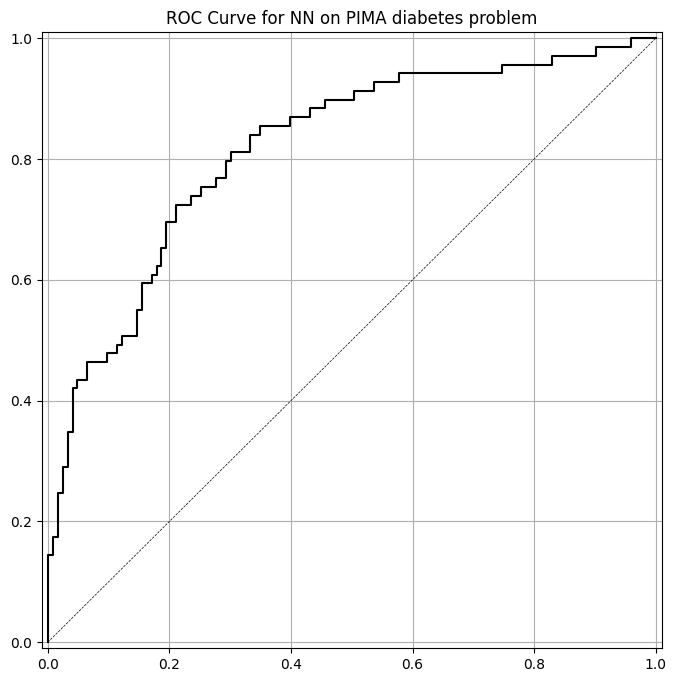

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

Based on the figure above, the model worked okay with the given hyperparams but cannot be considered reliable since its ROC AUC score is only 81% and accuracy of 75%.

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

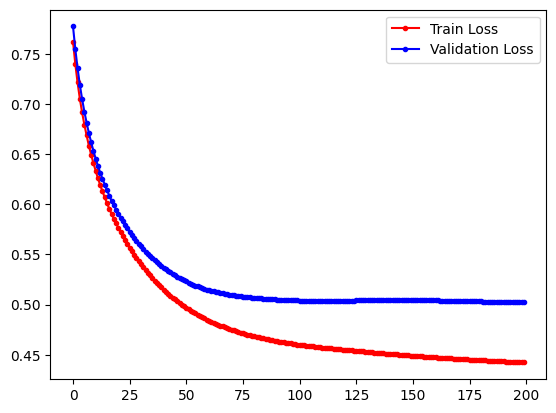

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

Validation data is used to provide an unbiased evaluation of the model during the training phase. In this case, the model works on train but when looking at the validation data, it seems like it overfits.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

In [ ]:
model_1  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")])

* Use a learning rate of .003 and train for 1500 epochs

In [ ]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 13ms/step - loss: 0.8235 - accuracy: 0.3733 - val_loss: 0.8089 - val_accuracy: 0.4479
Epoch 2/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7924 - accuracy: 0.3958 - val_loss: 0.7851 - val_accuracy: 0.4583
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7689 - accuracy: 0.4184 - val_loss: 0.7666 - val_accuracy: 0.4740
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7505 - accuracy: 0.4618 - val_loss: 0.7519 - val_accuracy: 0.4844
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7360 - accuracy: 0.4913 - val_loss: 0.7400 - val_accuracy: 0.4896
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7240 - accuracy: 0.5104 - val_loss: 0.7300 - val_accuracy: 0.5052
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7140 - accuracy: 0.5469 - val_loss: 0.7215 - val_accuracy: 0.5260
Epoch

* Graph the trajectory of the loss functions, accuracy on both train and test set

In [ ]:
y_pred_class_nn_1 = (model_1.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

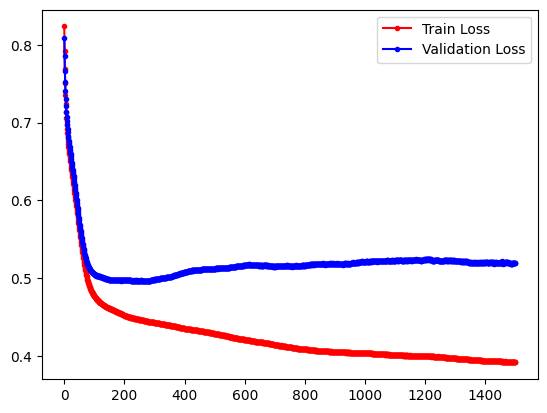

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

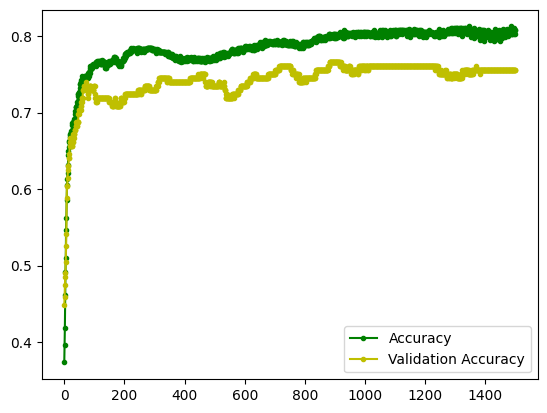

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["accuracy"],'g', marker='.', label="Accuracy")
ax.plot(run_hist_2.history["val_accuracy"],'y', marker='.', label="Validation Accuracy")
ax.legend()

* Plot the roc curve for the predictions

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.755
roc-auc is 0.811


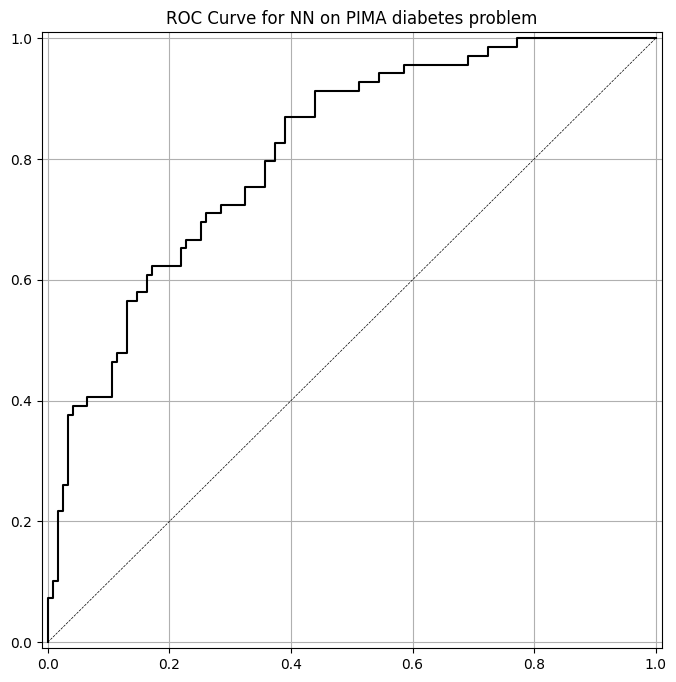

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

* Use different learning rates, numbers of epochs, and network structures.

In [ ]:
# Model 4 - using different number of epochs
model_4  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")])

In [ ]:
model_4.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_4 = model_4.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 [==============================] - 1s 14ms/step - loss: 0.7101 - accuracy: 0.4792 - val_loss: 0.6801 - val_accuracy: 0.5833
Epoch 2/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5694 - val_loss: 0.6585 - val_accuracy: 0.6510
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.6319 - val_loss: 0.6414 - val_accuracy: 0.6771
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6417 - accuracy: 0.6580 - val_loss: 0.6281 - val_accuracy: 0.6927
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6270 - accuracy: 0.6719 - val_loss: 0.6175 - val_accuracy: 0.6979
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6148 - accuracy: 0.6771 - val_loss: 0.6091 - val_accuracy: 0.7135
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6050 - accuracy: 0.6788 - val_loss: 0.6021 - val_accuracy: 0.7135
Epoch 8/500


In [ ]:
y_pred_class_nn_1 = (model_4.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model_4.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
accuracy_m4 = accuracy_score(y_test,y_pred_class_nn_1)
print(accuracy_m4)

0.765625


In [ ]:
# Using different number of learning rate and epochs
model_5  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")])

In [ ]:
model_5.compile(SGD(lr = .01), "binary_crossentropy", metrics=["accuracy"])
run_hist_5 = model_5.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=600)

Epoch 1/600
18/18 [==============================] - 1s 14ms/step - loss: 0.7010 - accuracy: 0.4080 - val_loss: 0.6914 - val_accuracy: 0.5260
Epoch 2/600
18/18 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5052 - val_loss: 0.6864 - val_accuracy: 0.5990
Epoch 3/600
18/18 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5833 - val_loss: 0.6823 - val_accuracy: 0.6458
Epoch 4/600
18/18 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.6372 - val_loss: 0.6789 - val_accuracy: 0.6458
Epoch 5/600
18/18 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.6528 - val_loss: 0.6758 - val_accuracy: 0.6406
Epoch 6/600
18/18 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.6562 - val_loss: 0.6732 - val_accuracy: 0.6406
Epoch 7/600
18/18 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.6545 - val_loss: 0.6708 - val_accuracy: 0.6406
Epoch 8/600


In [ ]:
y_pred_class_nn_1 = (model_5.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model_5.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
accuracy_m5 = accuracy_score(y_test,y_pred_class_nn_1)
print(accuracy_m5)

0.7552083333333334


In [ ]:
model_6  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(6, activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")])

In [ ]:
model_6.compile(SGD(lr = .5), "binary_crossentropy", metrics=["accuracy"])
run_hist_6 = model_6.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 [==============================] - 1s 15ms/step - loss: 0.6951 - accuracy: 0.5156 - val_loss: 0.6905 - val_accuracy: 0.6094
Epoch 2/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.6042 - val_loss: 0.6837 - val_accuracy: 0.6458
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.6667 - val_loss: 0.6779 - val_accuracy: 0.6562
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6741 - accuracy: 0.6736 - val_loss: 0.6729 - val_accuracy: 0.6354
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.6632 - val_loss: 0.6685 - val_accuracy: 0.6406
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6545 - val_loss: 0.6646 - val_accuracy: 0.6406
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.6562 - val_loss: 0.6611 - val_accuracy: 0.6406
Epoch 8/500


In [ ]:
y_pred_class_nn_1 = (model_6.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model_6.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


In [ ]:
accuracy_m6 = accuracy_score(y_test,y_pred_class_nn_1)
print(accuracy_m6)

0.765625


In [ ]:
model_7  = Sequential([
    Dense(8, input_shape=(8,), activation="relu"),
    Dense(8, activation="relu"),
    Dense(8, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")])

In [ ]:
model_7.compile(SGD(lr = .01), "binary_crossentropy", metrics=["accuracy"])
run_hist_7 = model_7.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 [==============================] - 1s 15ms/step - loss: 0.7080 - accuracy: 0.3663 - val_loss: 0.7031 - val_accuracy: 0.4010
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6988 - accuracy: 0.4427 - val_loss: 0.6950 - val_accuracy: 0.4948
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5469 - val_loss: 0.6884 - val_accuracy: 0.6094
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.6111 - val_loss: 0.6829 - val_accuracy: 0.6458
Epoch 5/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6793 - accuracy: 0.6372 - val_loss: 0.6781 - val_accuracy: 0.6354
Epoch 6/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6746 - accuracy: 0.6510 - val_loss: 0.6741 - val_accuracy: 0.6198
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6580 - val_loss: 0.6707 - val_accuracy: 0.6406
Epoch 8/500


In [ ]:
y_pred_class_nn_1 = (model_7.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model_7.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
accuracy_m7 = accuracy_score(y_test,y_pred_class_nn_1)
print(accuracy_m7)

0.7447916666666666


## Plotting the loss functions/accuracy of the created models

### Model 4

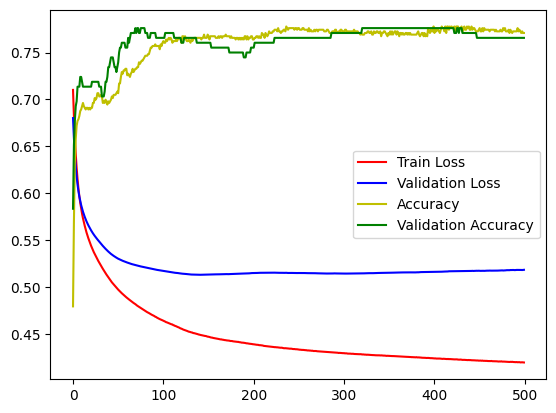

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_4.history["loss"],'r',  label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', label="Validation Loss")
ax.plot(run_hist_4.history["accuracy"],'y',  label="Accuracy")
ax.plot(run_hist_4.history["val_accuracy"],'g', label="Validation Accuracy")
ax.legend()

### Model 5

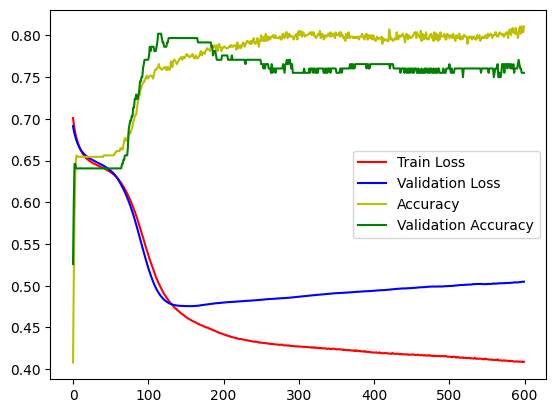

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_5.history["loss"],'r',  label="Train Loss")
ax.plot(run_hist_5.history["val_loss"],'b', label="Validation Loss")
ax.plot(run_hist_5.history["accuracy"],'y', label="Accuracy")
ax.plot(run_hist_5.history["val_accuracy"],'g', label="Validation Accuracy")
ax.legend()

### Model 6

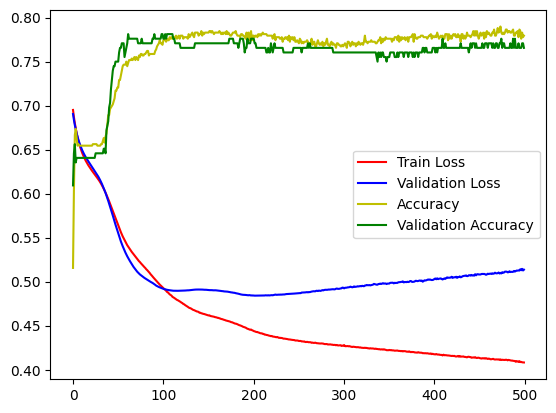

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_6.history["loss"],'r', label="Train Loss")
ax.plot(run_hist_6.history["val_loss"],'b', label="Validation Loss")
ax.plot(run_hist_6.history["accuracy"],'y', label="Accuracy")
ax.plot(run_hist_6.history["val_accuracy"],'g', label="Validation Accuracy")
ax.legend()

## Model 7

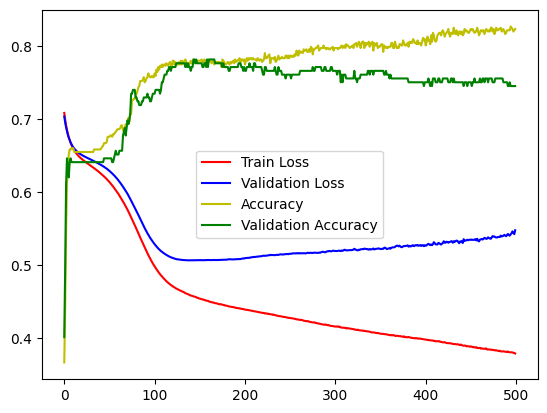

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_7.history["loss"],'r', label="Train Loss")
ax.plot(run_hist_7.history["val_loss"],'b', label="Validation Loss")
ax.plot(run_hist_7.history["accuracy"],'y', label="Accuracy")
ax.plot(run_hist_7.history["val_accuracy"],'g', label="Validation Accuracy")
ax.legend()

<ipython-input-50-c04778d7e302>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= model_acc, y=model_name, palette='magma')


<Axes: title={'center': 'Neural Network Models Accuracy'}>

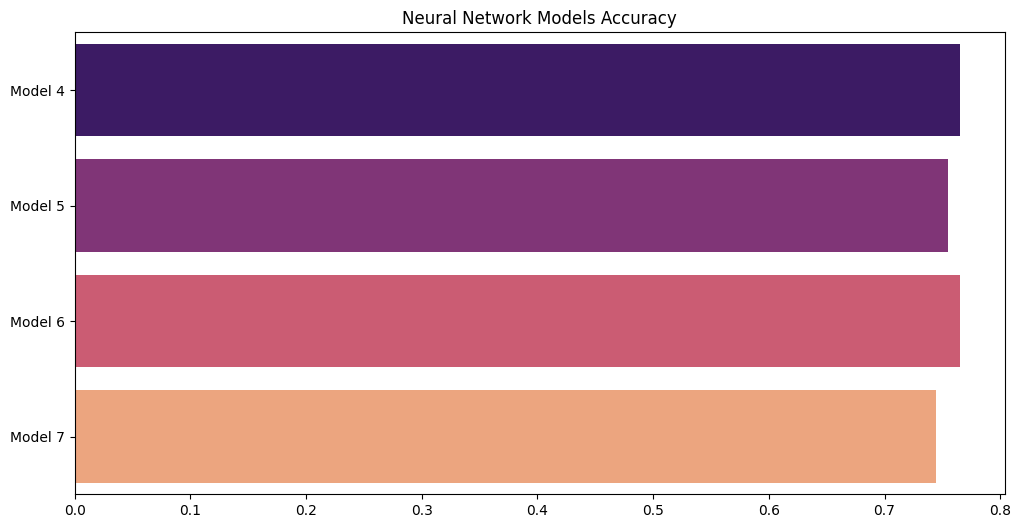

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Neural Network Models Accuracy')
model_acc = [accuracy_m4, accuracy_m5, accuracy_m6, accuracy_m7]
model_name = ['Model 4', 'Model 5', 'Model 6', 'Model 7']
sns.barplot(x= model_acc, y=model_name, palette='magma')

# Using another dataset

In [ ]:
bc_df = pd.read_csv('/content/drive/MyDrive/[1] COLLEGE/S03EP02/CPE313/Datasets/Copy of Breast Cancer.csv')
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
bc_df = bc_df.drop(['Unnamed: 32','id'],axis = 1)

bc_df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [ ]:
bc_df.shape

(569, 31)

In [ ]:
X = bc_df.drop('diagnosis',axis=1)
y = bc_df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

### Using learning rate of 0.003 and epoch of 1500

In [ ]:
bc_model  = Sequential([
    Dense(6, input_shape=(30,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")])

In [ ]:
bc_model.compile(Adam(lr=0.003), loss="binary_crossentropy", metrics=["accuracy"])
run_history = bc_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500)

Epoch 1/1500
15/15 [==============================] - 1s 16ms/step - loss: 231.2955 - accuracy: 0.6286 - val_loss: 222.7771 - val_accuracy: 0.6228
Epoch 2/1500
15/15 [==============================] - 0s 5ms/step - loss: 201.5371 - accuracy: 0.6286 - val_loss: 195.4139 - val_accuracy: 0.6228
Epoch 3/1500
15/15 [==============================] - 0s 4ms/step - loss: 176.7611 - accuracy: 0.6286 - val_loss: 171.6763 - val_accuracy: 0.6228
Epoch 4/1500
15/15 [==============================] - 0s 5ms/step - loss: 155.0238 - accuracy: 0.6286 - val_loss: 150.4627 - val_accuracy: 0.6228
Epoch 5/1500
15/15 [==============================] - 0s 5ms/step - loss: 136.0133 - accuracy: 0.6286 - val_loss: 131.8184 - val_accuracy: 0.6228
Epoch 6/1500
15/15 [==============================] - 0s 5ms/step - loss: 118.3427 - accuracy: 0.6286 - val_loss: 115.1722 - val_accuracy: 0.6228
Epoch 7/1500
15/15 [==============================] - 0s 4ms/step - loss: 103.4411 - accuracy: 0.6286 - val_loss: 99.9548 -

In [ ]:
y_pred_class_nn_1 = (bc_model.predict(X_test) > 0.5).astype('int32')
y_pred_prob_nn_1 = bc_model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
accuracy_bc_df= accuracy_score(y_test,y_pred_class_nn_1)
print(accuracy_bc_df)

0.9824561403508771


accuracy is 0.965
roc-auc is 0.997


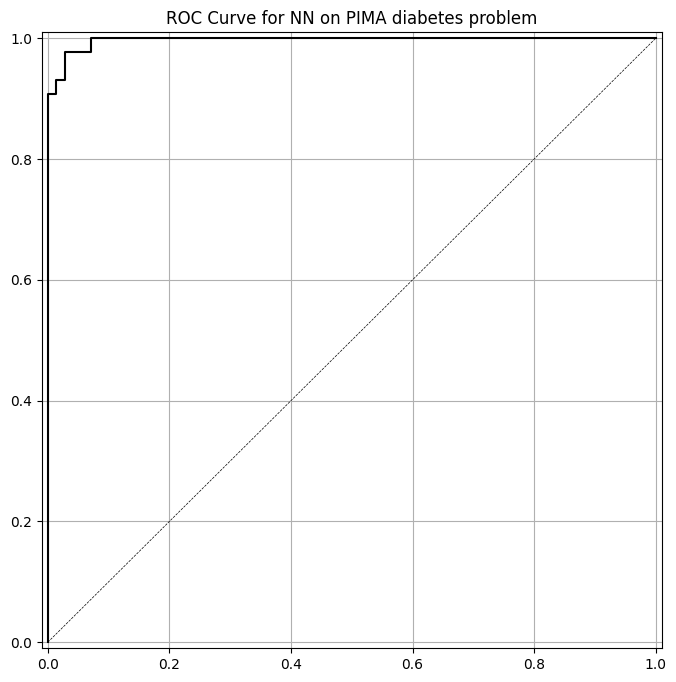

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

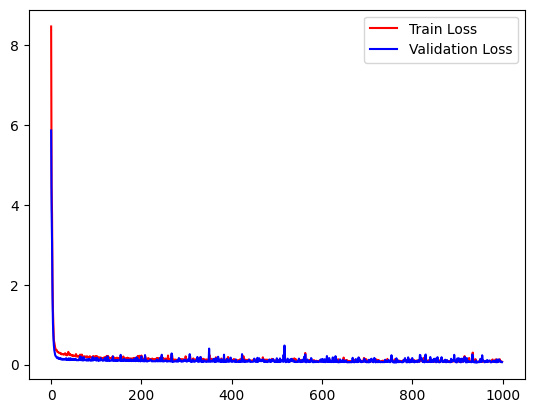

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_history.history["loss"],'r', label="Train Loss")
ax.plot(run_history.history["val_loss"],'b', label="Validation Loss")
ax.legend()

### Using learning rate of 0.01 and epochs of 1000

In [ ]:
bc_model_2  = Sequential([
    Dense(16, input_shape=(30,), activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
bc_model_2.compile(Adam(lr=0.01), loss="binary_crossentropy", metrics=["accuracy"])
run_history_2 = bc_model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Epoch 1/1000
15/15 [==============================] - 1s 17ms/step - loss: 141.7575 - accuracy: 0.3714 - val_loss: 93.3686 - val_accuracy: 0.3772
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 69.0349 - accuracy: 0.3714 - val_loss: 33.8350 - val_accuracy: 0.3772
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 22.0377 - accuracy: 0.3714 - val_loss: 12.4010 - val_accuracy: 0.3772
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.5567 - accuracy: 0.3736 - val_loss: 2.8075 - val_accuracy: 0.4211
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0845 - accuracy: 0.7231 - val_loss: 0.5068 - val_accuracy: 0.9035
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.8264 - val_loss: 0.5431 - val_accuracy: 0.8509
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5721 - accuracy: 0.7890 - val_loss: 0.5391 - val_accuracy: 0.850

In [ ]:
y_pred_class_nn_1 = (bc_model_2.predict(X_test) > 0.5).astype('int32')
y_pred_prob_nn_1 = bc_model_2.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
accuracy_bc_df_2= accuracy_score(y_test,y_pred_class_nn_1)
print(accuracy_bc_df_2)

0.9736842105263158


accuracy is 0.974
roc-auc is 0.997


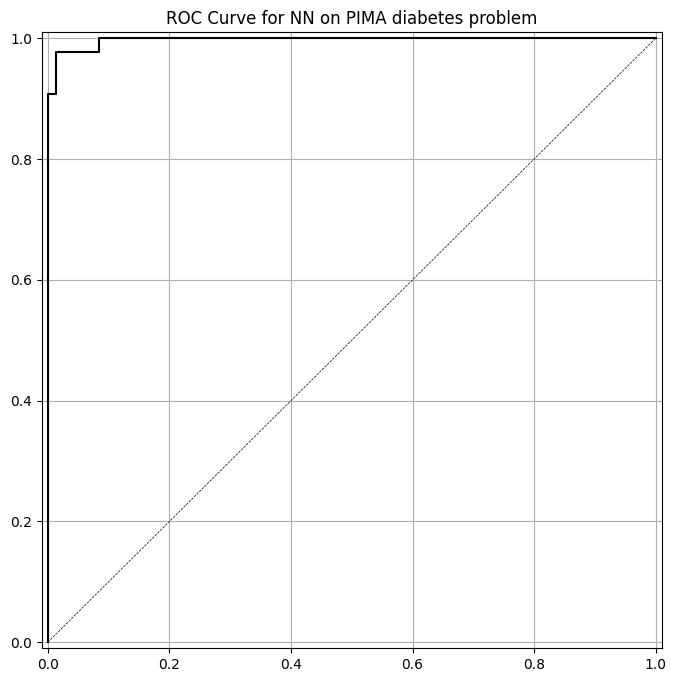

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

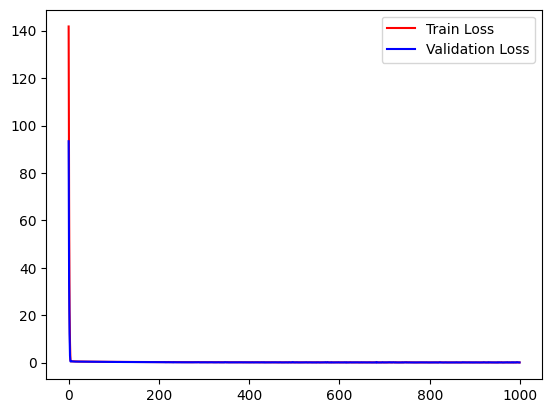

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_history_2.history["loss"],'r', label="Train Loss")
ax.plot(run_history_2.history["val_loss"],'b', label="Validation Loss")
ax.legend()

### Conclusion

As for the first model of the breast cancer dataset, the validation accuracy increased to 90% within 145 epochs. I used 2 hidden layers with 6 hidden nodes each and an epoch of 1500. Learning rate for this model is 0.003. The output of this model was able to reach an ROC AUC score of 99% and 96% for the accuracy which means that the predictive power of the model is working well.

Changing the learning rate to 0.01 for the second model did not change anything that much, except that it was able to achieve 90% validation accuracy within 11 epochs which means that it learned faster compared to the first model. It also gave the same roc auc and accuracy score.

Overall, this activity was able to help me learn the fundamentals of training a neural network. I am still having a difficulty with some parts of the activity, but with the practice of exploring with the hyperparameters, I am hoping that the future activities will be much more easier to understand.

### Google Colab Link
https://colab.research.google.com/drive/1axVe8NW4RFv0NmTko63IJ_e6MOyh21m7?usp=sharing